## Preparation of data:


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import re
# NLTK

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from bs4 import BeautifulSoup

# import sys
# !{sys.executable} -m pip install lxml

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sruthi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sruthi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/sruthi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
questions = pd.read_csv('../data/Questions.csv', encoding = "ISO-8859-1")
answers = pd.read_csv('../data/Answers.csv', encoding = "ISO-8859-1")
tags = pd.read_csv('../data/Tags.csv', encoding = "ISO-8859-1")

In [3]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [4]:
questions.shape

(1264216, 7)

In [5]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [6]:
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [7]:
questions_and_answers = questions.merge(answers, left_on=['OwnerUserId','Id'], right_on = ['OwnerUserId','ParentId'], how='left')

In [8]:
questions_and_answers = questions_and_answers.rename(columns = {'Id_x': 'QID',
                           'CreationDate_x': 'QuestionCreationDate', 
                           'Score_x': 'QuestionScore', 
                           'Body_x': 'QuestionBody', 
                           'CreationDate_y': 'AnswerCreationDate', 'Score_y': 'AnswerScore', 'Body_y': 'AnswerBody'})
questions_and_answers = questions_and_answers.drop(['Id_y', 'ParentId'], axis = 1)
questions_and_answers.head()

,QID,OwnerUserId,QuestionCreationDate,ClosedDate,QuestionScore,Title,QuestionBody,AnswerCreationDate,AnswerScore,AnswerBody
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,2008-08-01T16:09:47Z,12.0,<p>I wound up using this. It is a kind of a ha...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,NaN,NaN,NaN
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,NaN,NaN,NaN
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,NaN,NaN,NaN
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,2008-08-01T23:49:57Z,4.0,"<p>Yes, I thought about that, but I soon figur..."


In [9]:
questions_and_answers.shape

(1265467, 10)

In [10]:
grouped_tags = tags.groupby('Id')['Tag'].apply(list)
print(grouped_tags)

Id
80                                [flex, actionscript-3, air]
90          [svn, tortoisesvn, branch, branching-and-merging]
120                                   [sql, asp.net, sitemap]
180         [algorithm, language-agnostic, colors, color-s...
260              [c#, .net, scripting, compiler-construction]
                                  ...                        
40143210                                     [php, .htaccess]
40143300                                    [google-bigquery]
40143340                            [android, android-studio]
40143360                                 [javascript, vue.js]
40143380                                  [npm, mocha, babel]
Name: Tag, Length: 1264216, dtype: object


In [11]:
dataset_with_tags = questions_and_answers.merge(grouped_tags, left_on=['QID'], right_on=['Id'], how='inner')

In [12]:
dataset_with_tags.shape

(1265467, 11)

In [13]:
data = dataset_with_tags.copy(deep=True)
rows = data.shape[0]
cols = data.shape[1]
print(f"Rows: {rows} and Cols: {cols}")
print(f"Sample data: {data.head()}")

Rows: 1265467 and Cols: 11
Sample data:    QID  OwnerUserId  QuestionCreationDate            ClosedDate  \
0   80         26.0  2008-08-01T13:57:07Z                   NaN   
1   90         58.0  2008-08-01T14:41:24Z  2012-12-26T03:45:49Z   
2  120         83.0  2008-08-01T15:50:08Z                   NaN   
3  180    2089740.0  2008-08-01T18:42:19Z                   NaN   
4  260         91.0  2008-08-01T23:22:08Z                   NaN   

   QuestionScore                                              Title  \
0             26  SQLStatement.execute() - multiple queries in o...   
1            144  Good branching and merging tutorials for Torto...   
2             21                                  ASP.NET Site Maps   
3             53                 Function for creating color wheels   
4             49  Adding scripting functionality to .NET applica...   

                                        QuestionBody    AnswerCreationDate  \
0  <p>I've written a database generation script i...

In [14]:
print("Total no of questions:",data["QID"].nunique())

Total no of questions: 1264216


## Data Cleaning:

In [15]:
print(f"Minimum Score: {data['QuestionScore'].min()}")
print(f"Maximum Score: {data['QuestionScore'].max()}")

min_score = data['QuestionScore'].min()
max_score = data['QuestionScore'].max()

(data['QuestionScore'] >= 1).value_counts()

Minimum Score: -73
Maximum Score: 5190


False    670615
True     594852
Name: QuestionScore, dtype: int64

In [16]:
min_score = data['AnswerScore'].min()
max_score = data['AnswerScore'].max()

(data['AnswerScore'] >= 0).value_counts()

False    1137249
True      128218
Name: AnswerScore, dtype: int64

In [17]:
grouped_tags = tags.groupby(['Id', 'Tag']).size().groupby(level=1).sum().sort_values(ascending=False)
print("Count of each tag: ", grouped_tags)  # count of each tag

Count of each tag:  Tag
javascript    124155
java          115212
c#            101186
php            98808
android        90659
               ...  
tbcd               1
evil-dicom         1
evo                1
tbar               1
pjsua2             1
Length: 37034, dtype: int64


In [18]:
q = set()
for sublist in data['Tag'].values:
    q.update(sublist)
print("No of unique tags: ", len(q))

No of unique tags:  37035


In [19]:
# data = actual_data.copy(deep = True)
actual_data = data.copy(deep=True)
all_tags_list = [item for row in data['Tag'] for item in row]
tags_counts = nltk.FreqDist(all_tags_list)
_50_most_common = tags_counts.most_common(50)
most_common_tags = [tag[0] for tag in _50_most_common]
# Get the frequency counts of the 50 most common tags
tag_freq = [tags_counts[tag] for tag in most_common_tags]
print(f"Taking 50 most common - {most_common_tags}")


Taking 50 most common - ['javascript', 'java', 'c#', 'php', 'android', 'jquery', 'python', 'html', 'c++', 'ios', 'mysql', 'css', 'sql', 'asp.net', 'objective-c', 'ruby-on-rails', '.net', 'c', 'iphone', 'angularjs', 'arrays', 'sql-server', 'json', 'ruby', 'r', 'ajax', 'regex', 'xml', 'node.js', 'asp.net-mvc', 'linux', 'django', 'wpf', 'database', 'swift', 'xcode', 'string', 'excel', 'vb.net', 'windows', 'spring', 'wordpress', 'eclipse', 'html5', 'multithreading', 'oracle', 'git', 'facebook', 'forms', 'bash']


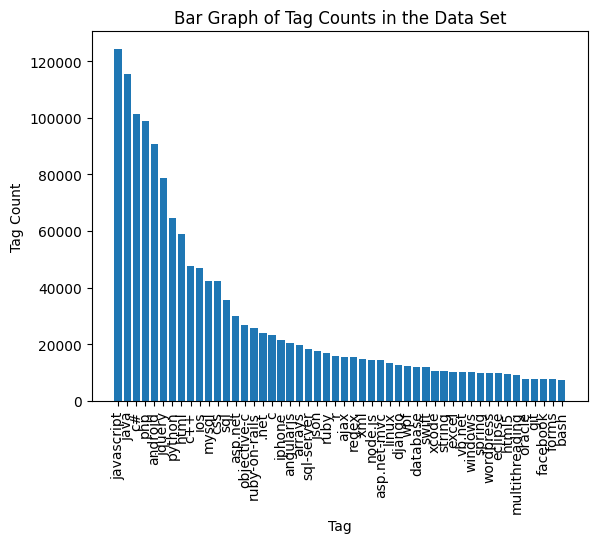

In [20]:
# Plot a bar graph of the tag frequency distribution
plt.bar(most_common_tags, tag_freq)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add axis labels and a title
plt.xlabel('Tag')
plt.ylabel('Tag Count')
plt.title('Bar Graph of Tag Counts in the Data Set')

# Show the plot
plt.show()


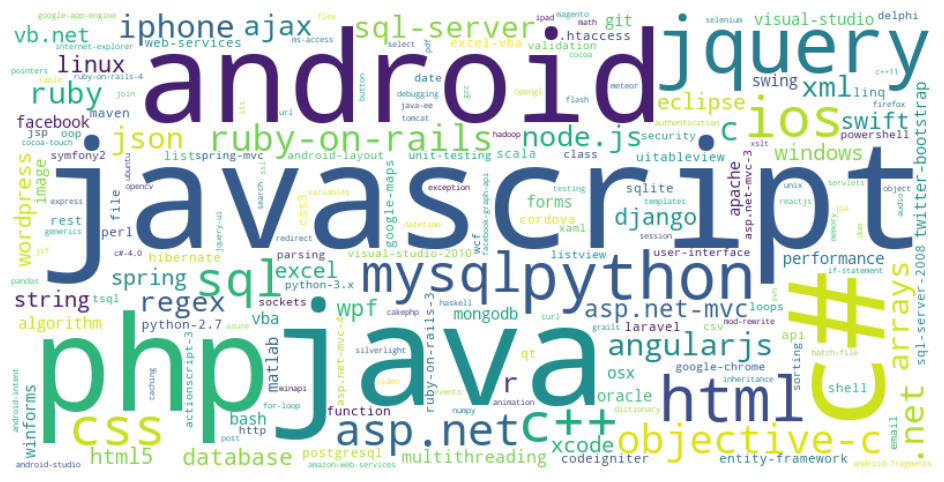

In [21]:
# Combine the tag names and their frequencies into a dictionary
tag_dict = dict(zip(most_common_tags, tag_freq))

# Create a word cloud from the tag dictionary
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(grouped_tags)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
# filtering the dataset with only the most common tags
def most_common(tags):
    tags_to_send = []
    for t in tags:
        if t in most_common_tags:
            tags_to_send.append(t)
    return tags_to_send


data['Tag'] = data['Tag'].apply(lambda x: most_common(x))
data['Tag'] = data['Tag'].apply(lambda x: x if len(x) > 0 else None)
data['QuestionScore'] = data['QuestionScore'].apply(lambda x: x if x >= 3 else None)
data.dropna(subset='Tag' , inplace=True)
data.dropna(subset='QuestionScore', inplace = True)

In [23]:
data

,QID,OwnerUserId,QuestionCreationDate,ClosedDate,QuestionScore,Title,QuestionBody,AnswerCreationDate,AnswerScore,AnswerBody,Tag
2,120,83.0,2008-08-01T15:50:08Z,NaN,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,NaN,NaN,NaN,"[sql, asp.net]"
4,260,91.0,2008-08-01T23:22:08Z,NaN,49.0,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,2008-08-01T23:49:57Z,4.0,"<p>Yes, I thought about that, but I soon figur...","[c#, .net]"
5,330,63.0,2008-08-02T02:51:36Z,NaN,29.0,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,NaN,NaN,NaN,[c++]
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13.0,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,NaN,NaN,NaN,[.net]
7,580,91.0,2008-08-02T23:30:59Z,NaN,21.0,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,NaN,NaN,NaN,[sql-server]
...,...,...,...,...,...,...,...,...,...,...,...
1265074,40134650,6435187.0,2016-10-19T14:42:25Z,2016-10-19T16:35:29Z,3.0,To find the overlapping of two date ranges and...,<p>We have blocks with specific no. of date ra...,NaN,NaN,NaN,[java]
1265101,40135240,1844024.0,2016-10-19T15:06:43Z,NaN,3.0,R ggplot2: Add means as horizontal line in a b...,<p>I have created a boxplot using ggplot2:</p>...,NaN,NaN,NaN,[r]
1265107,40135400,3581788.0,2016-10-19T15:12:54Z,NaN,3.0,Get attribute's name by it's value,<p>I need to return the key with a known <code...,NaN,NaN,NaN,"[ruby-on-rails, ruby]"
1265214,40137660,4350660.0,2016-10-19T17:12:05Z,NaN,3.0,Boost intrusive pointer,<p>I'm a little confused about boost's intrusi...,NaN,NaN,NaN,[c++]


In [24]:
print("From: ", actual_data["QID"].nunique())
print("To: ", data["QID"].nunique())

From:  1264216
To:  146290


In [25]:
l = [text for text in data['AnswerBody']]
print(l[11])

nan


In [26]:
data = data.drop(columns=['AnswerCreationDate', 'ClosedDate', 'QuestionCreationDate','OwnerUserId'])

In [27]:
data

,QID,QuestionScore,Title,QuestionBody,AnswerScore,AnswerBody,Tag
2,120,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,NaN,NaN,"[sql, asp.net]"
4,260,49.0,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,4.0,"<p>Yes, I thought about that, but I soon figur...","[c#, .net]"
5,330,29.0,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,NaN,NaN,[c++]
6,470,13.0,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,NaN,NaN,[.net]
7,580,21.0,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,NaN,NaN,[sql-server]
...,...,...,...,...,...,...,...
1265074,40134650,3.0,To find the overlapping of two date ranges and...,<p>We have blocks with specific no. of date ra...,NaN,NaN,[java]
1265101,40135240,3.0,R ggplot2: Add means as horizontal line in a b...,<p>I have created a boxplot using ggplot2:</p>...,NaN,NaN,[r]
1265107,40135400,3.0,Get attribute's name by it's value,<p>I need to return the key with a known <code...,NaN,NaN,"[ruby-on-rails, ruby]"
1265214,40137660,3.0,Boost intrusive pointer,<p>I'm a little confused about boost's intrusi...,NaN,NaN,[c++]


In [28]:
data.isna().sum()

QID                   0
QuestionScore         0
Title                 0
QuestionBody          0
AnswerScore      130964
AnswerBody       130964
Tag                   0
dtype: int64

In [29]:
grouped_answers = data.groupby('QID')['AnswerBody'].apply(list)
grouped_answers

QID
120                                                     [nan]
260         [<p>Yes, I thought about that, but I soon figu...
330                                                     [nan]
470                                                     [nan]
580                                                     [nan]
                                  ...                        
40134650                                                [nan]
40135240                                                [nan]
40135400                                                [nan]
40137660                                                [nan]
40140260                                                [nan]
Name: AnswerBody, Length: 146290, dtype: object

In [30]:
grouped_answers

QID
120                                                     [nan]
260         [<p>Yes, I thought about that, but I soon figu...
330                                                     [nan]
470                                                     [nan]
580                                                     [nan]
                                  ...                        
40134650                                                [nan]
40135240                                                [nan]
40135400                                                [nan]
40137660                                                [nan]
40140260                                                [nan]
Name: AnswerBody, Length: 146290, dtype: object

In [31]:
data_with_grouped_answers = data.merge(grouped_answers, left_on=['QID'], right_on=['QID'], how='left')
data_with_grouped_answers = data_with_grouped_answers.drop(columns=['AnswerBody_x'])

In [32]:
c = 0
for x in grouped_answers:
    if len(x) != 1 and pd.notna(x)[0]:
        c += 1
print('Total no of questions with answers: ', c)

Total no of questions with answers:  237


In [33]:
data.isna().sum()

data_with_grouped_answers.isna().sum() # This many null values are in the answer body

QID                   0
QuestionScore         0
Title                 0
QuestionBody          0
AnswerScore      130964
Tag                   0
AnswerBody_y          0
dtype: int64

In [34]:
data_with_grouped_answers

,QID,QuestionScore,Title,QuestionBody,AnswerScore,Tag,AnswerBody_y
0,120,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,NaN,"[sql, asp.net]",[nan]
1,260,49.0,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,4.0,"[c#, .net]","[<p>Yes, I thought about that, but I soon figu..."
2,330,29.0,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,NaN,[c++],[nan]
3,470,13.0,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,NaN,[.net],[nan]
4,580,21.0,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,NaN,[sql-server],[nan]
...,...,...,...,...,...,...,...
146590,40134650,3.0,To find the overlapping of two date ranges and...,<p>We have blocks with specific no. of date ra...,NaN,[java],[nan]
146591,40135240,3.0,R ggplot2: Add means as horizontal line in a b...,<p>I have created a boxplot using ggplot2:</p>...,NaN,[r],[nan]
146592,40135400,3.0,Get attribute's name by it's value,<p>I need to return the key with a known <code...,NaN,"[ruby-on-rails, ruby]",[nan]
146593,40137660,3.0,Boost intrusive pointer,<p>I'm a little confused about boost's intrusi...,NaN,[c++],[nan]


In [35]:
mask = pd.Series([np.nan not in lst for lst in data_with_grouped_answers.AnswerBody_y])
mask = mask[mask == True]
mask = mask.index.values.tolist()

data_with_grouped_answers['AnswerBody_y'] = data_with_grouped_answers.AnswerBody_y.str.join(sep=' ')

In [36]:
print(data_with_grouped_answers)

             QID  QuestionScore  \
0            120           21.0   
1            260           49.0   
2            330           29.0   
3            470           13.0   
4            580           21.0   
...          ...            ...   
146590  40134650            3.0   
146591  40135240            3.0   
146592  40135400            3.0   
146593  40137660            3.0   
146594  40140260            3.0   

                                                    Title  \
0                                       ASP.NET Site Maps   
1       Adding scripting functionality to .NET applica...   
2               Should I use nested classes in this case?   
3                   Homegrown consumption of web services   
4        Deploying SQL Server Databases from Test to Live   
...                                                   ...   
146590  To find the overlapping of two date ranges and...   
146591  R ggplot2: Add means as horizontal line in a b...   
146592                 Get att

In [37]:


data_with_grouped_answers['QuestionBody'].iloc[mask]  = data_with_grouped_answers['QuestionBody'].iloc[mask] + " " + data_with_grouped_answers['AnswerBody_y'].iloc[mask]



/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_59213/2841134462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_grouped_answers['QuestionBody'].iloc[mask]  = data_with_grouped_answers['QuestionBody'].iloc[mask] + " " + data_with_grouped_answers['AnswerBody_y'].iloc[mask]


In [38]:
data_with_grouped_answers = data_with_grouped_answers.drop(columns=['AnswerBody_y', 'AnswerScore'])

In [39]:
data_with_grouped_answers.isna().sum()

QID              0
QuestionScore    0
Title            0
QuestionBody     0
Tag              0
dtype: int64

In [40]:
data_with_grouped_answers.isna().sum() # This many null values are in the body
data_with_grouped_answers = data_with_grouped_answers.rename(columns = {'QuestionBody': 'Body'})
data_with_grouped_answers

,QID,QuestionScore,Title,Body,Tag
0,120,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net]"
1,260,49.0,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net]"
2,330,29.0,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,[c++]
3,470,13.0,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,[.net]
4,580,21.0,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,[sql-server]
...,...,...,...,...,...
146590,40134650,3.0,To find the overlapping of two date ranges and...,<p>We have blocks with specific no. of date ra...,[java]
146591,40135240,3.0,R ggplot2: Add means as horizontal line in a b...,<p>I have created a boxplot using ggplot2:</p>...,[r]
146592,40135400,3.0,Get attribute's name by it's value,<p>I need to return the key with a known <code...,"[ruby-on-rails, ruby]"
146593,40137660,3.0,Boost intrusive pointer,<p>I'm a little confused about boost's intrusi...,[c++]


In [41]:
# Converting html to text in the body

data_with_grouped_answers['Body'] = [BeautifulSoup(text).get_text() for text in data_with_grouped_answers['Body'] ]
data_with_grouped_answers['Title'] = [BeautifulSoup(text).get_text() for text in data_with_grouped_answers['Title'] ]

/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_59213/2444460143.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data_with_grouped_answers['Title'] = [BeautifulSoup(text).get_text() for text in data_with_grouped_answers['Title'] ]


In [42]:
print(data_with_grouped_answers)
print(data_with_grouped_answers.isna().sum())

             QID  QuestionScore  \
0            120           21.0   
1            260           49.0   
2            330           29.0   
3            470           13.0   
4            580           21.0   
...          ...            ...   
146590  40134650            3.0   
146591  40135240            3.0   
146592  40135400            3.0   
146593  40137660            3.0   
146594  40140260            3.0   

                                                    Title  \
0                                       ASP.NET Site Maps   
1       Adding scripting functionality to .NET applica...   
2               Should I use nested classes in this case?   
3                   Homegrown consumption of web services   
4        Deploying SQL Server Databases from Test to Live   
...                                                   ...   
146590  To find the overlapping of two date ranges and...   
146591  R ggplot2: Add means as horizontal line in a b...   
146592                 Get att

In [43]:
token = ToktokTokenizer()
punct = '!"$%&\'#()*+,./:;<=>?@[\\]^_`{|}~'
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


def clean_text(text):
    text = text.lower()
    text = text.strip(' ')
    return text

def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

def clean_punct(text): 
    words = token.tokenize(text)
    tokens = [token for token in words if not re.match(re.compile('[%s]' % re.escape(punct)), token)]
    filtered_list = strip_list_noempty(tokens)
    return ' '.join(map(str, filtered_list))

def lemmatizeWords(text):
    words = token.tokenize(text)
    listLemma = []
    for w in words:
        x = lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    stop_words = set(stopwords.words("english"))
    words = token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))

In [44]:
new_question_df = data_with_grouped_answers.copy(deep=True)

In [45]:
# Remove stopwords, punctuation and lemmatize for text in body
new_question_df['Body'] = new_question_df['Body'].apply(lambda x: clean_text(x)) 
new_question_df['Body'] = new_question_df['Body'].apply(lambda x: clean_punct(x)) 
new_question_df['Body'] = new_question_df['Body'].apply(lambda x: lemmatizeWords(x))
new_question_df['Body'] = new_question_df['Body'].apply(lambda x: stopWordsRemove(x))

# Remove stopwords, punctuation and lemmatize for title.
new_question_df['Title'] = new_question_df['Title'].apply(lambda x: str(x))
new_question_df['Title'] = new_question_df['Title'].apply(lambda x: clean_text(x)) 
new_question_df['Title'] = new_question_df['Title'].apply(lambda x: clean_punct(x)) 
new_question_df['Title'] = new_question_df['Title'].apply(lambda x: lemmatizeWords(x)) 
new_question_df['Title'] = new_question_df['Title'].apply(lambda x: stopWordsRemove(x))

In [46]:
merged_df = new_question_df.copy(deep=True)

In [47]:
merged_df.drop(columns=['QID', 'QuestionScore'], inplace=True)
merged_df

,Title,Body,Tag
0,asp.net site map,anyone get experience create sql-based asp.net...,"[sql, asp.net]"
1,add script functionality applications,little game write c#. use database back-end. t...,"[c#, .net]"
2,use nest class case,work collection class use video playback recor...,[c++]
3,homegrown consumption web service,write web service app ready consume them. see ...,[.net]
4,deploy sql server databases test live,wonder guy manage deployment database 2 sql se...,[sql-server]
...,...,...,...
146590,find overlap two date range merge one date ran...,block specific no. date range require merge da...,[java]
146591,r ggplot2 add mean horizontal line boxplot,create boxplot use ggplot2 library( ggplot2 da...,[r]
146592,get attribute name value,need return key know value model. f foo.find_b...,"[ruby-on-rails, ruby]"
146593,boost intrusive pointer,little confuse boost intrusive pointer. defini...,[c++]


In [48]:
merged_df.isna().sum()

Title    0
Body     0
Tag      0
dtype: int64

In [49]:
merged_df['Combined_text'] = merged_df['Title'] + ' ' + merged_df['Body']

## EDA: 

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from scipy. sparse import hstack

In [51]:
no_topics = 20

In [52]:
X1 = merged_df['Body']
X2 = merged_df['Title']
y = merged_df['Tag']
XC3 = merged_df['Combined_text']

In [53]:
vectorizer_X1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [54]:

X1_tfidf = vectorizer_X1.fit_transform(X1)
X2_tfidf = vectorizer_X2.fit_transform(X2)
XC3_tfidf = vectorizer_X1.fit_transform(XC3)


## LDA for Body

In [56]:
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50,random_state=11).fit(X1_tfidf)

In [57]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("--------------------------------------------")
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("--------------------------------------------")
        

no_top_words = 10
display_topics(lda, vectorizer_X1.get_feature_names_out(), no_top_words)

--------------------------------------------
Topic 0:
fetch project err rule usage version bundle install -- command
--------------------------------------------
--------------------------------------------
Topic 1:
apple usage dictionary apply server. appear useful go extra generate
--------------------------------------------
--------------------------------------------
Topic 2:
animation name= node xml learn layout_width= match_parent 10 wrap_content id=
--------------------------------------------
--------------------------------------------
Topic 3:
var func class= full type id= console.log( value= name= html
--------------------------------------------
--------------------------------------------
Topic 4:
represent separate generic usage fetch err pass generate print( uri
--------------------------------------------
--------------------------------------------
Topic 5:
status int const c++ char create printf( main( vector void
--------------------------------------------
--------

## Data Preparation


In [55]:
X_1 = merged_df['Body']
X_2 = merged_df['Title']
y_label = merged_df['Tag']
X_C3 = merged_df['Combined_text']

multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [56]:
y_bin

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [57]:
vectorizer_X_1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X_2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [58]:
X_1_tfidf = vectorizer_X_1.fit_transform(X_1)
X_2_tfidf = vectorizer_X_2.fit_transform(X_2)
X_C3_tfidf = vectorizer_X_1.fit_transform(X_C3)
X_tfidf = hstack([X_1_tfidf,X_2_tfidf])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size = 0.2, random_state = 0) # Do 80/20 split

In [59]:
print("X train shape", X_train.shape)
print("y train shape", y_train.shape)
print("X test shape", X_test.shape)
print("y test shape", y_test.shape)

X train shape (117276, 2000)
y train shape (117276, 50)
X test shape (29319, 2000)
y test shape (29319, 50)


## Classification and Prediction

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer,hamming_loss,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.multioutput import ClassifierChain
from sklearn.multiclass import OneVsRestClassifier 
from skmultilearn.problem_transform import BinaryRelevance

In [61]:
def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)))
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("F1-score: {}".format(f1))
    print("---")  

In [93]:
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression(max_iter=1000) 
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier
Hamming loss: 0.028436849824345987
F1-score: 0.0
---
Clf:  SGDClassifier
Hamming loss: 0.01650601998703912
F1-score: 0.5965449913209437
---
Clf:  LogisticRegression
Hamming loss: 0.01572973157338245
F1-score: 0.6495652847866418
---
Clf:  MultinomialNB
Hamming loss: 0.020141205361710837
F1-score: 0.5801524911132278
---
Clf:  LinearSVC
Hamming loss: 0.015402298850574713
F1-score: 0.6577817178594272
---
Clf:  Perceptron
Hamming loss: 0.023373239196425526
F1-score: 0.5930029029461164
---
Clf:  PassiveAggressiveClassifier
Hamming loss: 0.01977830076059893
F1-score: 0.6320626609403085
---


In [62]:
# Define base classifiers
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
nb = MultinomialNB()
svm = LinearSVC(random_state=42, max_iter=1000)

for classifier in [dt, lr, nb, svm]:
    clf = OneVsRestClassifier(classifier, verbose=10, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  9.6min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 11.0min remaining:   42.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.3min finished


Clf:  DecisionTreeClassifier
Hamming loss: 0.022586036358675263
F1-score: 0.5947873432735022
---


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    9.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    9.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.7s finished


Clf:  LogisticRegression
Hamming loss: 0.01572973157338245
F1-score: 0.6495652847866418
---


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1132s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1527s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished


Clf:  MultinomialNB
Hamming loss: 0.020141205361710837
F1-score: 0.5801524911132278
---


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    7.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    7.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.9s finished


Clf:  LinearSVC
Hamming loss: 0.015402298850574713
F1-score: 0.6577817178594272
---


In [64]:
# Define base classifiers
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
nb = MultinomialNB()
svm = LinearSVC(random_state=42, max_iter=1000)

for classifier in [dt, lr, nb, svm]:
    clf = ClassifierChain(classifier, verbose=10)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

/Users/sruthi/anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Chain] .................. (1 of 50) Processing order 0, total= 2.4min
[Chain] .................. (2 of 50) Processing order 1, total=  46.4s
[Chain] .................. (3 of 50) Processing order 2, total= 2.6min
[Chain] .................. (4 of 50) Processing order 3, total= 1.3min
[Chain] .................. (5 of 50) Processing order 4, total=  58.3s
[Chain] .................. (6 of 50) Processing order 5, total= 1.9min
[Chain] .................. (7 of 50) Processing order 6, total= 1.1min
[Chain] .................. (8 of 50) Processing order 7, total=  45.7s
[Chain] .................. (9 of 50) Processing order 8, total= 2.4min
[Chain] ................. (10 of 50) Processing order 9, total= 2.1min
[Chain] ................ (11 of 50) Processing order 10, total= 3.0min
[Chain] ................ (12 of 50) Processing order 11, total= 1.4min
[Chain] ................ (13 of 50) Processing order 12, total=  59.4s
[Chain] ................ (14 of 50) Processing order 13, total=  52.1s
[Chain

/Users/sruthi/anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Chain] .................. (1 of 50) Processing order 0, total=   2.0s
[Chain] .................. (2 of 50) Processing order 1, total=   1.1s
[Chain] .................. (3 of 50) Processing order 2, total=   1.5s
[Chain] .................. (4 of 50) Processing order 3, total=   1.1s
[Chain] .................. (5 of 50) Processing order 4, total=   1.0s
[Chain] .................. (6 of 50) Processing order 5, total=   1.3s
[Chain] .................. (7 of 50) Processing order 6, total=   1.3s
[Chain] .................. (8 of 50) Processing order 7, total=   1.0s
[Chain] .................. (9 of 50) Processing order 8, total=   1.4s
[Chain] ................. (10 of 50) Processing order 9, total=   2.5s
[Chain] ................ (11 of 50) Processing order 10, total=   2.0s
[Chain] ................ (12 of 50) Processing order 11, total=   1.4s
[Chain] ................ (13 of 50) Processing order 12, total=   1.4s
[Chain] ................ (14 of 50) Processing order 13, total=   0.9s
[Chain

/Users/sruthi/anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Chain] .................. (1 of 50) Processing order 0, total=   0.0s
[Chain] .................. (2 of 50) Processing order 1, total=   0.0s
[Chain] .................. (3 of 50) Processing order 2, total=   0.0s
[Chain] .................. (4 of 50) Processing order 3, total=   0.0s
[Chain] .................. (5 of 50) Processing order 4, total=   0.0s
[Chain] .................. (6 of 50) Processing order 5, total=   0.0s
[Chain] .................. (7 of 50) Processing order 6, total=   0.0s
[Chain] .................. (8 of 50) Processing order 7, total=   0.0s
[Chain] .................. (9 of 50) Processing order 8, total=   0.0s
[Chain] ................. (10 of 50) Processing order 9, total=   0.0s
[Chain] ................ (11 of 50) Processing order 10, total=   0.0s
[Chain] ................ (12 of 50) Processing order 11, total=   0.0s
[Chain] ................ (13 of 50) Processing order 12, total=   0.0s
[Chain] ................ (14 of 50) Processing order 13, total=   0.0s
[Chain

/Users/sruthi/anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Chain] .................. (1 of 50) Processing order 0, total=   1.3s
[Chain] .................. (2 of 50) Processing order 1, total=   0.5s
[Chain] .................. (3 of 50) Processing order 2, total=   0.7s
[Chain] .................. (4 of 50) Processing order 3, total=   0.4s
[Chain] .................. (5 of 50) Processing order 4, total=   0.6s
[Chain] .................. (6 of 50) Processing order 5, total=   1.0s
[Chain] .................. (7 of 50) Processing order 6, total=   0.7s
[Chain] .................. (8 of 50) Processing order 7, total=   0.4s
[Chain] .................. (9 of 50) Processing order 8, total=   0.9s
[Chain] ................. (10 of 50) Processing order 9, total=   2.1s
[Chain] ................ (11 of 50) Processing order 10, total=   1.0s
[Chain] ................ (12 of 50) Processing order 11, total=   0.6s
[Chain] ................ (13 of 50) Processing order 12, total=   0.6s
[Chain] ................ (14 of 50) Processing order 13, total=   0.3s
[Chain

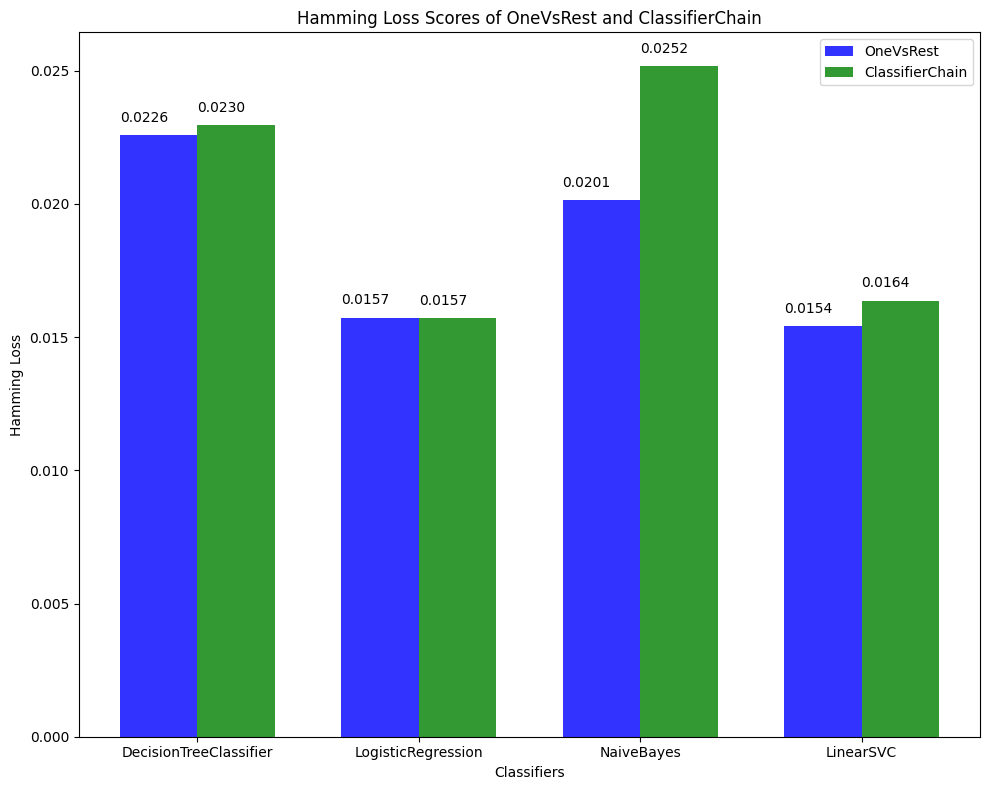

/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_59213/2211079522.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


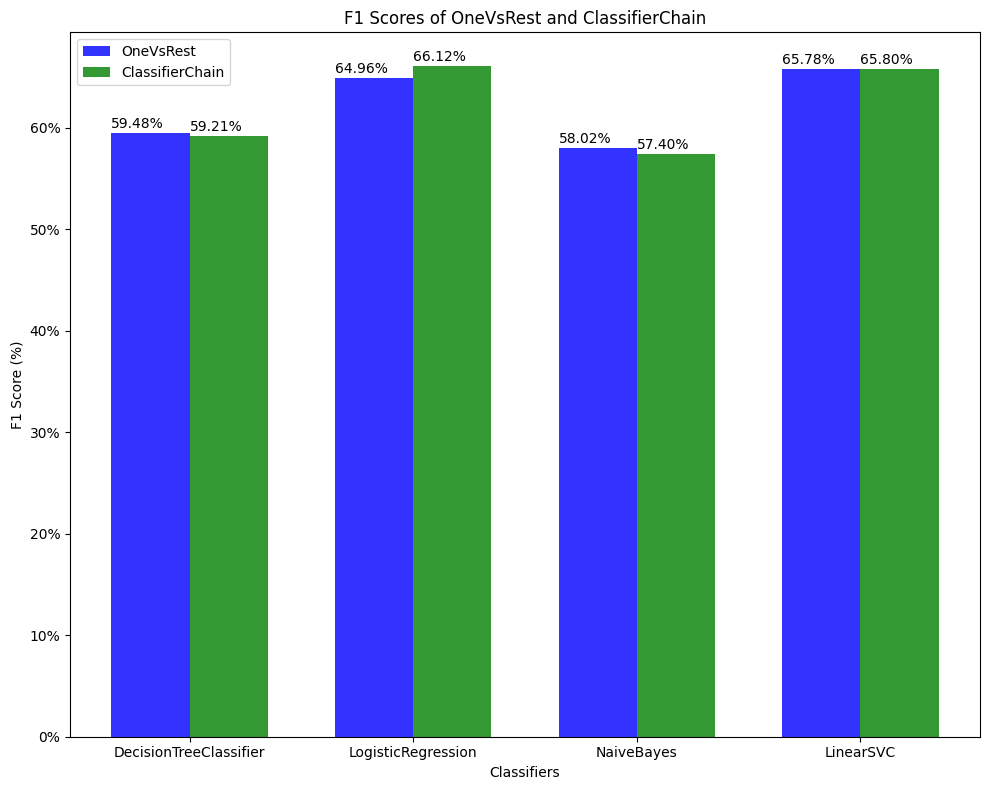

In [71]:
base_classifiers = ['DecisionTreeClassifier', 'LogisticRegression', 'NaiveBayes', 'LinearSVC']
classifiers = ['OneversusRest', 'ClassifierChain']
ovr_hamming = [0.022586036358675263, 0.01572973157338245, 0.020141205361710837, 0.015402298850574713]
ovr_f1 = [0.5947873432735022, 0.6495652847866418, 0.5801524911132278, 0.6577817178594272]
cc_hamming = [0.022951669565810566, 0.015724274361335652, 0.025184351444455813, 0.01637300044339848]
cc_f1 = [0.5920582352357796, 0.661166668340934, 0.574024475286693, 0.6579651323720949]

bar_width = 0.35
opacity = 0.8

# Plot Hamming loss scores
plt.figure(figsize=(10, 8))
index = np.arange(len(base_classifiers))
plt.bar(index, ovr_hamming, bar_width, alpha=opacity, color='b', label='OneVsRest')
plt.bar(index + bar_width, cc_hamming, bar_width, alpha=opacity, color='g', label='ClassifierChain')
plt.xticks(index + bar_width / 2, base_classifiers)
plt.xlabel('Classifiers')
plt.ylabel('Hamming Loss')
plt.title('Hamming Loss Scores of OneVsRest and ClassifierChain')
plt.legend()

# Add labels above each bar
for i, v in enumerate(ovr_hamming):
    plt.text(i - bar_width/2, v + 0.0005, "{:.4f}".format(v), color='black', fontsize=10)
for i, v in enumerate(cc_hamming):
    plt.text(i + bar_width/2, v + 0.0005, "{:.4f}".format(v), color='black', fontsize=10)

plt.tight_layout()
plt.show()

# Plot F1 scores
plt.figure(figsize=(10, 8))
index = np.arange(len(base_classifiers))
plt.bar(index, [score * 100 for score in ovr_f1], bar_width, alpha=opacity, color='b', label='OneVsRest')
plt.bar(index + bar_width, [score * 100 for score in cc_f1], bar_width, alpha=opacity, color='g', label='ClassifierChain')
plt.xticks(index + bar_width / 2, base_classifiers)
plt.xlabel('Classifiers')
plt.ylabel('F1 Score (%)')
plt.title('F1 Scores of OneVsRest and ClassifierChain')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.legend()

# Add labels above each bar
for i, v in enumerate(ovr_f1):
    plt.text(i - bar_width/2, v*100 + 0.5, "{:.2f}%".format(v*100), color='black', fontsize=10)
for i, v in enumerate(cc_f1):
    plt.text(i + bar_width/2, v*100 + 0.5, "{:.2f}%".format(v*100), color='black', fontsize=10)

plt.tight_layout()
plt.show()


In [65]:
# Define base classifiers
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
nb = MultinomialNB()
svm = LinearSVC(random_state=42, max_iter=1000)

for classifier in [dt, lr, nb, svm]:
    clf = BinaryRelevance(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

In [79]:
def avg_jacard(y_true,y_pred):
    '''
    see https://en.wikipedia.org/wiki/Multi-label_classification#Statistics_and_evaluation_metrics
    '''
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)
    
    return jacard.mean()*100

In [92]:
from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'loss': ['hinge', 'modified_huber'],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'alpha': [0.0001, 0.001, 0.1],
#     'eta0':[0.0001, 0.001, 0.1]

# }
# # Create logistic regression object
# lr = SGDClassifier(random_state=42, max_iter=2000)
# # svc = OneVsRestClassifier(LinearSVC())
# # CV_svc = model_selection.GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5, verbose=10, scoring=make_scorer(avg_jacard,greater_is_better=True))
# # CV_svc.fit(X_train, y_train)

# # Create OneVsRestClassifier object
# clf = OneVsRestClassifier(lr)

# # Create GridSearchCV object
# grid_lr = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=10)

# # Fit the GridSearchCV object to the data
# grid_lr.fit(X_train, y_train)

# # Print the best parameters and the corresponding score
# print("Best parameters: ", grid_lr.best_params_)
# print("Best score: ", grid_lr.best_score_)

#SGDC
# param_grid = {
#     'estimator__loss': ['hinge', 'modified_huber'],
#     'estimator__penalty': ['l2', 'l1', 'elasticnet'],
#     'estimator__alpha': [0.0001, 0.001, 0.1],
#     'estimator__eta0':[0.0001, 0.001, 0.1],
#     'n_jobs': [-1]
# }


param_grid = {
    # 'estimator__penalty': ['l2', 'l1', 'elasticnet'],
    'estimator__C': [1, 10],
    'n_jobs': [-1]
}
# Create logistic regression object
lr = LinearSVC(random_state=42, max_iter=10000)

# Create OneVsRestClassifier object
clf = OneVsRestClassifier(lr)

# Create GridSearchCV object
grid_lr = GridSearchCV(clf, param_grid, cv=5, verbose=10, scoring=make_scorer(hamming_loss))

# Fit the GridSearchCV object to the data
grid_lr.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_lr.best_params_)
print("Best score: ", grid_lr.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START estimator__C=1, n_jobs=-1...................................
[CV 1/5; 1/2] END ....estimator__C=1, n_jobs=-1;, score=0.016 total time=   7.3s
[CV 2/5; 1/2] START estimator__C=1, n_jobs=-1...................................
[CV 2/5; 1/2] END ....estimator__C=1, n_jobs=-1;, score=0.016 total time=   6.0s
[CV 3/5; 1/2] START estimator__C=1, n_jobs=-1...................................
[CV 3/5; 1/2] END ....estimator__C=1, n_jobs=-1;, score=0.016 total time=   6.0s
[CV 4/5; 1/2] START estimator__C=1, n_jobs=-1...................................
[CV 4/5; 1/2] END ....estimator__C=1, n_jobs=-1;, score=0.015 total time=   5.9s
[CV 5/5; 1/2] START estimator__C=1, n_jobs=-1...................................
[CV 5/5; 1/2] END ....estimator__C=1, n_jobs=-1;, score=0.016 total time=   6.2s
[CV 1/5; 2/2] START estimator__C=10, n_jobs=-1..................................
[CV 1/5; 2/2] END ...estimator__C=10, n_jobs=-1;,

In [ ]:
lr = LogisticRegression(max_iter=1000)
clf = OneVsRestClassifier(classifier)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Y Pred", y_pred)
print("Y Train", y_test)


Y Pred [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
Y Train [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [ ]:
# def display_confusion(c_matrix):
#     """
#     Displays the confusion matrix using matrix show
#     Args:
#         c_matrix: square confusion matrix, shape (num_classes, num_classes)
#     """
#     _, ax = plt.subplots()
#     ax.matshow(c_matrix, cmap=plt.cm.Blues)
#     for i in range(y_train.shape[0]):
#         for j in range(y_train.shape[0]):
#             ax.text(i, j, str(y_train[j, i]), va='center', ha='center')
    # plt.show()
for i in range(y_train.shape[1]):
    print(multilabel_binarizer.classes_[i])
    print(confusion_matrix(y_test[:,i], y_pred[:,i]))

.net
[[27438   634]
 [ 1045   202]]
ajax
[[28957    75]
 [  151   136]]
android
[[26662   155]
 [  441  2061]]
angularjs
[[28776    62]
 [  151   330]]
arrays
[[28782   116]
 [  294   127]]
asp.net
[[28398   141]
 [  544   236]]
asp.net-mvc
[[28746    78]
 [  271   224]]
bash
[[28943   154]
 [   86   136]]
c
[[28131   261]
 [  506   421]]
c#
[[25053   620]
 [ 1825  1821]]
c++
[[26909   353]
 [  573  1484]]
css
[[27946   398]
 [  273   702]]
database
[[28880   150]
 [  220    69]]
django
[[28847    40]
 [   69   363]]
eclipse
[[28934    50]
 [  119   216]]
excel
[[29120    34]
 [   57   108]]
facebook
[[29112    38]
 [   48   121]]
forms
[[29132    57]
 [  110    20]]
git
[[28844    42]
 [   36   397]]
html
[[27676   488]
 [  722   433]]
html5
[[28926   112]
 [  191    90]]
ios
[[27382   549]
 [  632   756]]
iphone
[[28273   207]
 [  549   290]]
java
[[24996   803]
 [ 1288  2232]]
javascript
[[25587   808]
 [ 1361  1563]]
jquery
[[27275   388]
 [  554  1102]]
json
[[28837   108]
 [  147

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# # create a k-NN classifier object
# knn = KNeighborsClassifier(n_neighbors=3)
# clf = OneVsRestClassifier(knn)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print_score(y_pred, knn)